The Imports

In [17]:
import dotenv
import os
from pydantic import BaseModel, Field
from langchain.document_loaders import PyMuPDFLoader
from config import OUTPUT_DIR, DEFAULT_MODEL

dotenv.load_dotenv()

True

In [15]:
%load_ext autoreload
%autoreload 2

from utils import query_document, process_figure_answers, expand_figure_answers, write_analysis_to_file, query_and_expand

In [13]:
# ensure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)


## Extracting Details of the Paper

Pydantic Models for Structured Output

In [18]:
# Define the model
class FiguresCount(BaseModel):
    total_figures: int = Field(description="Total number of figures in the paper")

class PaperDetails(BaseModel):
    title: str = Field(description="Title of the paper")
    abstract: str = Field(description="Abstract of the paper")
    authors: str = Field(description="Authors of the paper")


Extract the details from the paper: 
- Title
- Abstract
- Authors
- Number of figures

In [19]:
loader = PyMuPDFLoader("papers/p2xa_paper.pdf")
document = loader.load()

In [41]:
from templates import FIGURE_COUNT_TEMPLATE

figure_count_response = query_document(document, 
                                       prompt_template=FIGURE_COUNT_TEMPLATE, 
                                       model_name=DEFAULT_MODEL, 
                                       pydantic_model=FiguresCount)

In [35]:
from templates import EXTRACT_DETAILS_TEMPLATE

details_response = query_document(document, 
                                  prompt_template=EXTRACT_DETAILS_TEMPLATE, 
                                  model_name=DEFAULT_MODEL, 
                                  pydantic_model=PaperDetails)

In [43]:
print(f"Title: {details_response.title}\n")
print(f"Abstract: {details_response.abstract}\n")
print(f"Authors: {details_response.authors}\n")
print(f"Number of figures: {figure_count_response.total_figures}\n")


Title: Increased surface P2X4 receptor regulates anxiety and memory in P2X4 internalization-defective knock-in mice

Abstract: ATP signaling and surface P2X4 receptors are upregulated selectively in neurons and/or glia in various CNS disorders including anxiety, chronic pain, epilepsy, ischemia, and neurodegenerative diseases. However, the cell-specific functions of P2X4 in pathological contexts remain elusive. To elucidate P2X4 functions, we created a conditional transgenic knock-in P2X4 mouse line (Floxed P2X4mCherryIN) allowing the Cre activity-dependent genetic swapping of the internalization motif of P2X4 by the fluorescent mCherry protein to prevent constitutive endocytosis of P2X4. By combining molecular, cellular, electrophysiological, and behavioral approaches, we characterized two distinct knock-in mouse lines expressing noninternalized P2X4mCherryIN either exclusively in excitatory forebrain neurons or in all cells natively expressing P2X4. The genetic substitution of wild-t

### Extracting the information about each figure from the paper, then expanding the answers

In [8]:
# Extracting information about each figure from the paper 
print(f"Extracting information about each figure from the paper {details_response.title}...")
answers = process_figure_answers(document, figure_count_response.total_figures)
print(f"Expanding the answers for {details_response.title}...")
expanded_answers = expand_figure_answers(document, answers)

Processing Figure 1...
Processing Figure 2...
Processing Figure 3...
Processing Figure 4...
Processing Figure 5...
Expanding Answers for Figure 1...
Expanding Answers for Figure 2...
Expanding Answers for Figure 3...
Expanding Answers for Figure 4...
Expanding Answers for Figure 5...


Lets look at our answers

In [14]:
output_file = f"{OUTPUT_DIR}/figure_analysis_results.txt"
print(f"Writing the analysis to {output_file}...")
write_analysis_to_file(answers, expanded_answers, output_file)

Analysis written successfully to output/figure_analysis_results.txt


## Extracing background information 

Looking for preqrequisites to understand the paper

In [5]:
from templates import BACKGROUND_TEMPLATE

background_response = query_document(document, 
                                    prompt_template=BACKGROUND_TEMPLATE, 
                                    model_name=DEFAULT_MODEL)

print(background_response)

content='The paper titled "Increased surface P2X4 receptor regulates anxiety and memory in P2X4 internalization-defective knock-in mice" by Eléonore Bertin and colleagues discusses the role of P2X4 receptors in the central nervous system (CNS), particularly in relation to anxiety and memory functions. The background information presented in the paper outlines several critical concepts and topics that are essential for understanding the research findings. Below is a detailed explanation of these concepts:\n\n### Background Information:\n\n1. **P2X4 Receptors**: \n   - P2X4 receptors are part of a family of receptors known as purinergic receptors, specifically activated by ATP (adenosine triphosphate). These receptors are ion channels that facilitate the flow of cations (such as Na⁺ and Ca²⁺) across cell membranes when activated, which can lead to various cellular responses.\n   - P2X4 receptors display high calcium permeability and are found in both neurons and glial cells (supporting c

In [7]:
print(background_response.content)

The paper titled "Increased surface P2X4 receptor regulates anxiety and memory in P2X4 internalization-defective knock-in mice" by Eléonore Bertin and colleagues discusses the role of P2X4 receptors in the central nervous system (CNS), particularly in relation to anxiety and memory functions. The background information presented in the paper outlines several critical concepts and topics that are essential for understanding the research findings. Below is a detailed explanation of these concepts:

### Background Information:

1. **P2X4 Receptors**: 
   - P2X4 receptors are part of a family of receptors known as purinergic receptors, specifically activated by ATP (adenosine triphosphate). These receptors are ion channels that facilitate the flow of cations (such as Na⁺ and Ca²⁺) across cell membranes when activated, which can lead to various cellular responses.
   - P2X4 receptors display high calcium permeability and are found in both neurons and glial cells (supporting cells in the CNS

In [14]:
# expand the answer
expanded_background_response = query_and_expand(document, 
                                    prompt_template=BACKGROUND_TEMPLATE, 
                                    model_name=DEFAULT_MODEL, 
                                    text=document)

print(expanded_background_response.content)

The paper titled "Increased surface P2X4 receptor regulates anxiety and memory in P2X4 internalization-defective knock-in mice" by Eléonore Bertin et al. presents a comprehensive examination of the P2X4 receptor's role in the central nervous system (CNS) and its implications in neuropsychiatric disorders. The study focuses on how the increased surface expression of the P2X4 receptor affects anxiety and memory functions, particularly in the context of genetically modified mouse models that exhibit altered receptor internalization.

### Expanded Background Information

1. **P2X4 Receptors**:
   - P2X4 receptors belong to the family of purinergic receptors and are specifically activated by ATP (adenosine triphosphate). They serve as cation channels that, upon activation, allow the influx of sodium (Na⁺) and calcium (Ca²⁺) ions into cells, which is critical for various physiological functions, including synaptic transmission and modulation.
   - These receptors are predominantly expressed 

{'search_metadata': {'id': 'search_omMjwVJvBznTV16V7vynp5OY',
  'status': 'Success',
  'created_at': '2024-11-08T03:13:27Z',
  'request_time_taken': 0.61,
  'parsing_time_taken': 0.11,
  'total_time_taken': 0.72,
  'request_url': 'https://www.google.com/search?q=what+is+the+capital+of+france&oq=what+is+the+capital+of+france&gl=us&hl=en&ie=UTF-8',
  'html_url': 'https://www.searchapi.io/api/v1/searches/search_omMjwVJvBznTV16V7vynp5OY.html',
  'json_url': 'https://www.searchapi.io/api/v1/searches/search_omMjwVJvBznTV16V7vynp5OY'},
 'search_parameters': {'engine': 'google',
  'q': 'what is the capital of france',
  'device': 'desktop',
  'google_domain': 'google.com',
  'hl': 'en',
  'gl': 'us'},
 'search_information': {'query_displayed': 'what is the capital of france',
  'total_results': 768000000,
  'time_taken_displayed': 0.29,
  'detected_location': 'United States'},
 'answer_box': {'type': 'core_answer',
  'answer': 'France capital: Paris',
  'thumbnail': 'http://t2.gstatic.com/lice
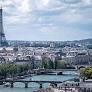
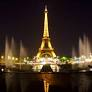
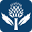
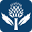
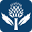

In [17]:
# testing search
import requests
serpa_api_key = os.getenv("SERPA_API_KEY")
serpi_url = "https://www.searchapi.io/api/v1/search?engine=google"

def search_query(query):
    response = requests.get(serpi_url, headers={"Authorization": f"Bearer {serpa_api_key}"}, params={"q": query})
    return response.json()

search_query("what is the capital of france")

## Testing OpenRouter models

In [60]:
from src.chat_router import ChatOpenRouter, OpenRouterConfig
import os

# With custom configuration
config = OpenRouterConfig(
    api_key=os.getenv('OPENROUTER_API_KEY'),
    max_retries=5,
    timeout=60.0
)
router = ChatOpenRouter(
    model_name="google/gemma-2-9b-it:free",
    config=config,
)


In [62]:

# Use it with LangChain's features
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate(template="tell me a 'your mamma' joke about {topic}", input_variables=["topic"])
chain = prompt | router

# Regular invocation
response = chain.invoke({"topic": "programming"})
print(response.content)



Your momma's code is so buggy, it runs on Windows 98!  😄 



In [53]:

summarize_prompt = """Summarize the following text:
{text}
"""

outline_prompt = """Outline the following text from an academic paper by following these steps:

1. Main Research Question/Objective
   - State the primary research goals and questions addressed
   - Identify the key hypotheses being tested

2. Background & Context
   - Summarize relevant previous research
   - Explain the knowledge gap being addressed
   - Define key concepts and terminology

3. Methods & Experimental Design
   - List the key experimental procedures
   - Describe the study design and methodology
   - Detail any statistical analyses performed

4. Results & Findings
   - Present the major experimental results
   - Highlight key data and observations
   - Explain statistical significance

5. Conclusions & Implications
   - Summarize the main conclusions
   - Discuss broader impacts and applications
   - Note any limitations and future directions

Text: {text}
"""

explain_prompt = """Answer the following question from an academic paper, be very detailed:
Question:{question}

Text: {text}
"""
test_prompt = PromptTemplate(template=outline_prompt, input_variables=["text"])
test_chain = test_prompt | router

test_response = test_chain.invoke({"text": document})
print(test_response.content)

## Outline of "Increased surface P2X4 receptor regulates anxiety and memory in P2X4 internalization-defective knock-in mice"

**1. Main Research Question/Objective**

* **Primary goal:** To elucidate the functional role of P2X4 receptors, particularly their surface density, in anxiety and memory processes.
* **Hypotheses:**
    * Increasing surface P2X4 receptor density will alter synaptic plasticity in the hippocampus.
    * These synaptic changes will translate into behavioral effects on anxiety and spatial memory.

**2. Background & Context**

* **Previous research:** ATP signaling and P2X4 receptors are implicated in various neurological and psychiatric disorders. However, their specific roles in these conditions remain unclear, particularly the impact of P2X4 surface density.
* **Knowledge gap:** This study aims to clarify how alterations in P2X4 surface expression impact neuronal function and behavior.

* **Key concepts:** 
    * P2X4 receptors: ATP-gated ion channels involved in

In [58]:
class ResearchObjective(BaseModel):
    main_question: str = Field(description="Primary research question or goal of the paper")
    hypotheses: list[str] = Field(description="Key hypotheses being tested in the research")

class BackgroundContext(BaseModel):
    previous_research: str = Field(description="Summary of relevant previous research")
    knowledge_gap: str = Field(description="Description of the knowledge gap being addressed")
    key_concepts: list[str] = Field(description="List of key concepts and terminology with definitions")

class Methodology(BaseModel):
    procedures: list[str] = Field(description="Key experimental procedures used")
    study_design: str = Field(description="Description of the study design and methodology")
    statistical_analyses: str = Field(description="Statistical analyses performed in the study")

class Results(BaseModel):
    major_findings: list[str] = Field(description="Major experimental results and findings")
    key_data: str = Field(description="Highlight of key data and observations")
    statistical_significance: str = Field(description="Explanation of statistical significance")

class Conclusions(BaseModel):
    main_conclusions: list[str] = Field(description="Main conclusions drawn from the research")
    implications: str = Field(description="Broader impacts and applications of the research")
    limitations: list[str] = Field(description="Limitations of the study")
    future_directions: list[str] = Field(description="Suggested future research directions")

class PaperOutline(BaseModel):
    research_objective: ResearchObjective = Field(description="Research objectives and hypotheses")
    background: BackgroundContext = Field(description="Background and context information")
    methods: Methodology = Field(description="Methods and experimental design")
    results: Results = Field(description="Results and findings")
    conclusions: Conclusions = Field(description="Conclusions and implications")

outline_response = query_document(document, 
                                prompt_template=outline_prompt, 
                                model_name=DEFAULT_MODEL, 
                                pydantic_model=PaperOutline)
print(outline_response)

research_objective=ResearchObjective(main_question='What are the effects of increased surface P2X4 receptor density on anxiety and memory in P2X4 internalization-defective knock-in mice?', hypotheses=['Increased surface density of P2X4 receptors contributes to alterations in anxiety and memory functions.', 'P2X4 internalization-defective knock-in mice will exhibit changes in synaptic plasticity that affect learning and memory.']) background=BackgroundContext(previous_research='Previous studies indicate that ATP signaling and surface P2X4 receptors are selectively upregulated in various CNS disorders, including anxiety and neurodegenerative diseases. However, the specific roles of P2X4 in these contexts remain unclear.', knowledge_gap='The cell-specific functions of P2X4 in pathological contexts and the impact of increased surface P2X4 on neuronal behavior have not been fully elucidated.', key_concepts=['P2X4 receptor: A type of ATP-gated cation channel involved in neuronal signaling.',

In [59]:
def print_paper_outline(outline: PaperOutline) -> None:
    """
    Print a formatted version of the PaperOutline response.
    
    Args:
        outline (PaperOutline): The paper outline object to print
    """
    print("📑 PAPER OUTLINE\n")
    
    print("🎯 RESEARCH OBJECTIVE")
    print(f"Main Question: {outline.research_objective.main_question}")
    print("\nHypotheses:")
    for idx, hypothesis in enumerate(outline.research_objective.hypotheses, 1):
        print(f"  {idx}. {hypothesis}")
    
    print("\n📚 BACKGROUND & CONTEXT")
    print(f"Previous Research: {outline.background.previous_research}")
    print(f"\nKnowledge Gap: {outline.background.knowledge_gap}")
    print("\nKey Concepts:")
    for idx, concept in enumerate(outline.background.key_concepts, 1):
        print(f"  {idx}. {concept}")
    
    print("\n🔬 METHODOLOGY")
    print("Procedures:")
    for idx, procedure in enumerate(outline.methods.procedures, 1):
        print(f"  {idx}. {procedure}")
    print(f"\nStudy Design: {outline.methods.study_design}")
    print(f"Statistical Analyses: {outline.methods.statistical_analyses}")
    
    print("\n📊 RESULTS")
    print("Major Findings:")
    for idx, finding in enumerate(outline.results.major_findings, 1):
        print(f"  {idx}. {finding}")
    print(f"\nKey Data: {outline.results.key_data}")
    print(f"Statistical Significance: {outline.results.statistical_significance}")
    
    print("\n🎓 CONCLUSIONS")
    print("Main Conclusions:")
    for idx, conclusion in enumerate(outline.conclusions.main_conclusions, 1):
        print(f"  {idx}. {conclusion}")
    print(f"\nImplications: {outline.conclusions.implications}")
    print("\nLimitations:")
    for idx, limitation in enumerate(outline.conclusions.limitations, 1):
        print(f"  {idx}. {limitation}")
    print("\nFuture Directions:")
    for idx, direction in enumerate(outline.conclusions.future_directions, 1):
        print(f"  {idx}. {direction}")

# Usage example:
print_paper_outline(outline_response)

📑 PAPER OUTLINE

🎯 RESEARCH OBJECTIVE
Main Question: What are the effects of increased surface P2X4 receptor density on anxiety and memory in P2X4 internalization-defective knock-in mice?

Hypotheses:
  1. Increased surface density of P2X4 receptors contributes to alterations in anxiety and memory functions.
  2. P2X4 internalization-defective knock-in mice will exhibit changes in synaptic plasticity that affect learning and memory.

📚 BACKGROUND & CONTEXT
Previous Research: Previous studies indicate that ATP signaling and surface P2X4 receptors are selectively upregulated in various CNS disorders, including anxiety and neurodegenerative diseases. However, the specific roles of P2X4 in these contexts remain unclear.

Knowledge Gap: The cell-specific functions of P2X4 in pathological contexts and the impact of increased surface P2X4 on neuronal behavior have not been fully elucidated.

Key Concepts:
  1. P2X4 receptor: A type of ATP-gated cation channel involved in neuronal signaling.
 